# Trabajo Integrador

## 1. Selección del dataset
Elegimos el **dataset 1**, que contiene datos sobre distintas estaciones meteorológicas de Australia.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Seteo esta opcion en True para evitar que me exprese los valores numericos con notacion cientifica
np.set_printoptions(suppress=True)

In [3]:
australian_weather_data = pd.read_csv('./data/weatherAUS.csv',encoding='utf-8',sep=',',skipinitialspace=True)

In [4]:
australian_weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## 2. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
    - Realizar los siguientes análisis por tipo de variable:
        - Numéricas: Obtener conclusiones acerca de la distribución de los datos.
        - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc.
        - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver?
- Variables de salida (en caso de aplicar):
    - ¿Están balanceadas las clases?
    - (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

**Visualizamos las primeras filas**

In [5]:
australian_weather_data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Identificamos los tipos de datos**

In [56]:
australian_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Veamos una descripcion de las variables numericas con la ayuda de pandas

In [7]:
australian_weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


| Variable | Descripción | Tipo | Es informativa | Entrada / Salida | 
| -------- | ---------- | ---- | -------------- | ---------------- |
| Date     | Fecha de la medición | Fecha/Hora | Si | Entrada |
| Location | Ubicación geográfica | Categorica Nominal | Si | Entrada |
| MinTemp | Temperatura mínima registrada (celsius) | Numérica Continua | Si | Entrada |
| MaxTemp | Temperatura máxima registrada (celsius) |Numérica Continua | Si | Entrada |
| Rainfall | Precipitaciones registradas (mm) | Numérica Continua | Si | Entrada |
| Evaporation | Evaporación registrada (mm) | Numérica Continua | Si | Entrada |
| Sunshine | Cantidad de horas de sol | Numérica Continua | Si | Entrada |
| WindGustDir | Dirección del viento más fuerte registrado durante el día | Categórica Nominal | Si | Entrada |
| WindGustSpeed | Velocidad del viento más fuerte registrada durante el día (km/h) | Numérica continua | Si | Entrada |
| WindDir9am | Dirección del viento registrada a las 9 am | Categórica Nominal | Si | Entrada |
| WindDir3pm | Dirección del viento registrada a las 3 pm | Categórica Nominal | Si | Entrada |
| WindSpeed9am | Velocidad del viento registrada a las 9 am (km/h) | Numérica continua | Si | Entrada |
| WindSpeed3pm | Velocidad del viento registrada a las 3 pm (km/h) | Numérica continua | Si | Entrada |
| Humidity9am | Humedad registrada a las 9 am (%) | Numérica continua | Si | Entrada |
| Humidity3pm | Humedad registrada a las 3 pm (%) | Numérica continua | Si | Entrada |
| Pressure9am | Presión atmosférica registrada a las 9 am (hpa) | Numérica continua | Si | Entrada |
| Pressure3pm | Presión atmosférica registrada a las 3 pm (hpa) | Numérica continua | Si | Entrada |
| Cloud9am | Fracción del cielo oscurecido por las nubesa las 9 am | Numérica continua | Si | Entrada |
| Cloud3pm | Fracción del cielo oscurecido por las nubesa las 3 pm | Numérica continua | Si | Entrada |
| Temp9am | Temperatura registrada a las 9 am (celsius) | Numérica continua | Si | Entrada |
| Temp3pm | Temperatura registrada a las 3 pm (celsius) | Numérica continua | Si | Entrada |
| RainToday | Flag que indica si llovio durante el día (Yes/No) | Categorica Nominal | Si | Entrada |
| RainTomorrow | Flag que indica si lloverá al día siguiente (Yes/No) | Categórica Nominal | - | Salida |

**Analicemos las features numéricas**

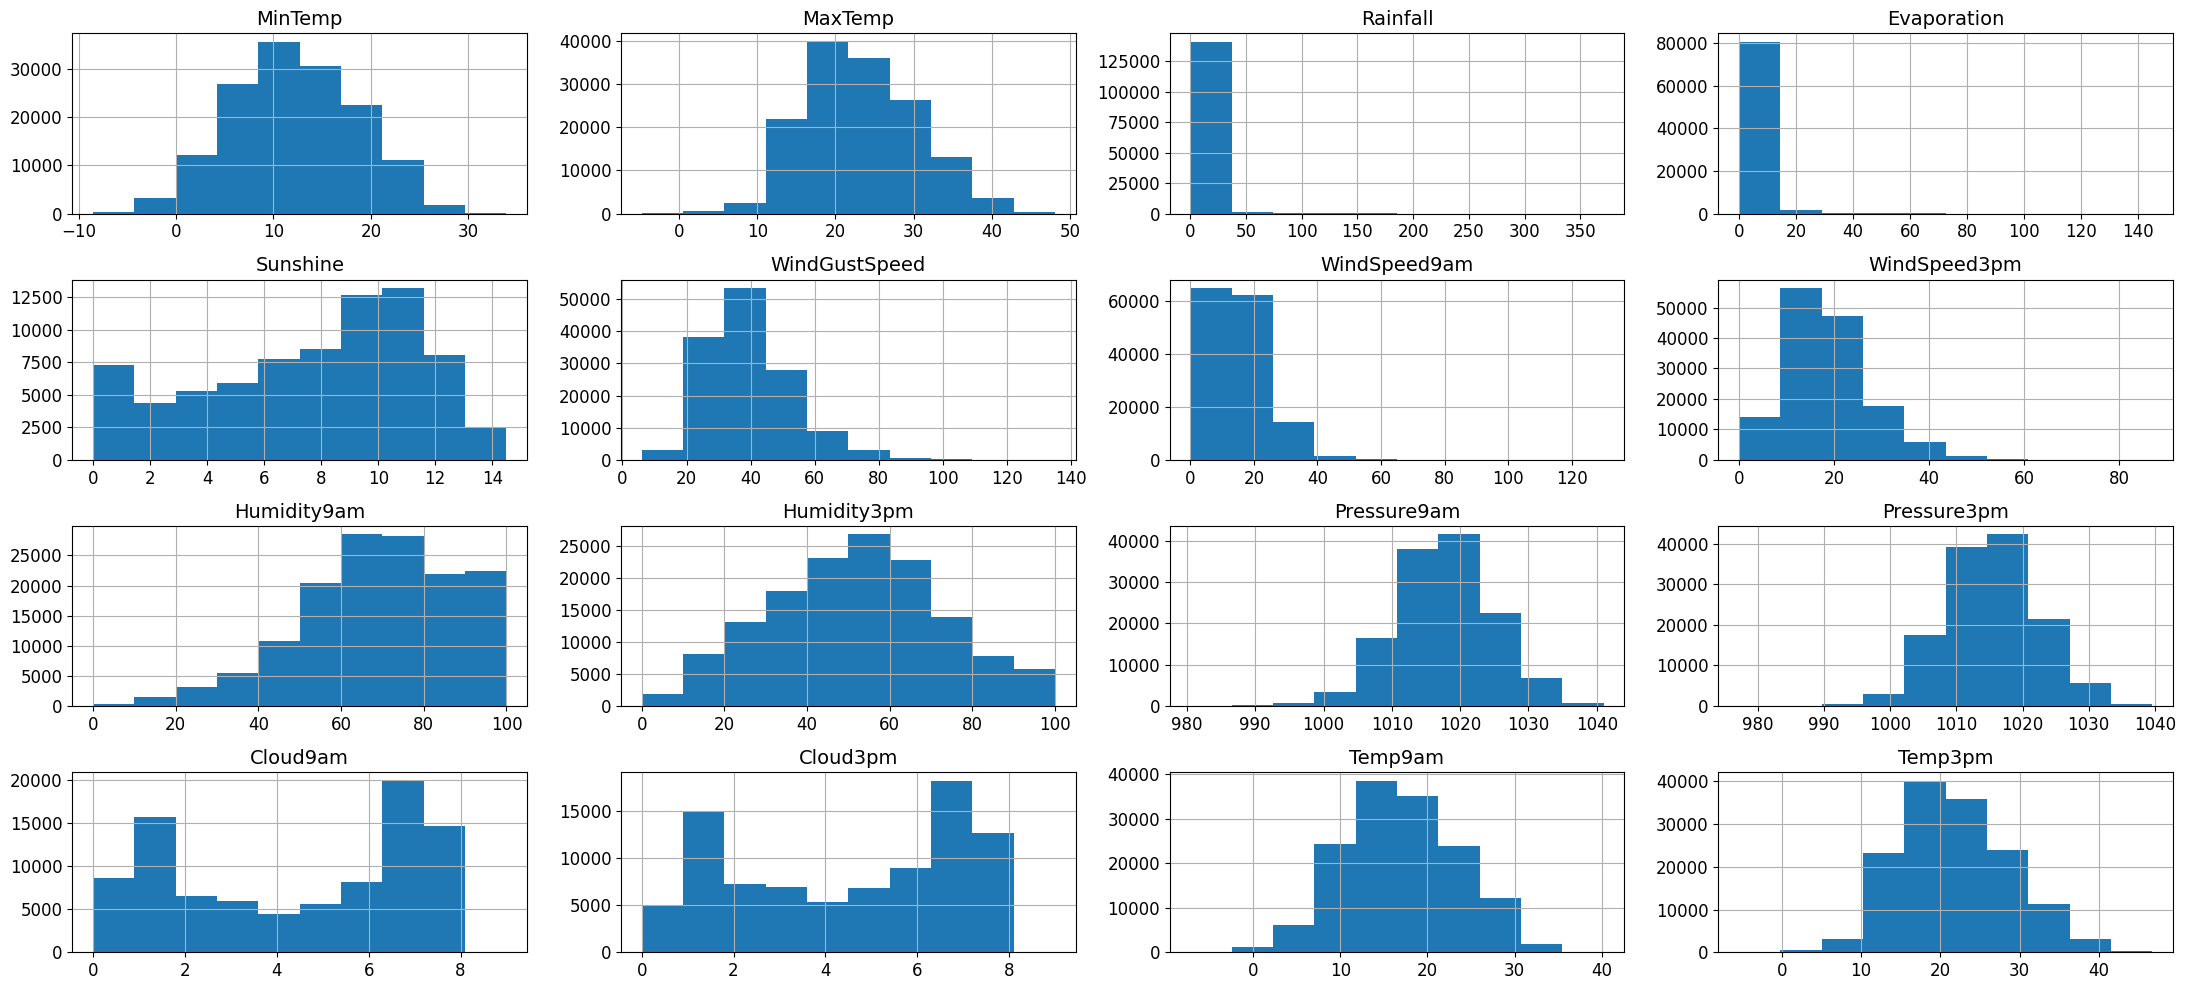

In [28]:
fig = australian_weather_data.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
[x.title.set_size(14) for x in fig.ravel()]
plt.tight_layout()
plt.show()

Viendo el histograma de las features numéricas, podemos inferir que:
- Las features **(Rainfall, Evaporation, Cloud9am, Cloud3pm)** tienen una distribución que **no** es normal.
- Las features restantes tienen una distribución normal pero no simétrica, con diferentes oblicuidades.

Proponemos entonces:
- Aplicar transformaciones a las features para normalizarlas.
- Estandarizarlas para escalarlas y que aquellas de mayor magnitud no dominen a las de menor magnitud.

**Analicemos las features categóricas**

Vamos a ver la cardinalidad de las variables categóricas

In [31]:
australian_weather_data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [33]:
australian_weather_data.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [10]:
australian_weather_data.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [11]:
australian_weather_data.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [12]:
australian_weather_data.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [34]:
# Resumimos
cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in cat_features:
    print('Feature: ', col, 'Number of categories: ', australian_weather_data[col].nunique())

Feature:  Location Number of categories:  49
Feature:  WindGustDir Number of categories:  16
Feature:  WindDir9am Number of categories:  16
Feature:  WindDir3pm Number of categories:  16
Feature:  RainToday Number of categories:  2


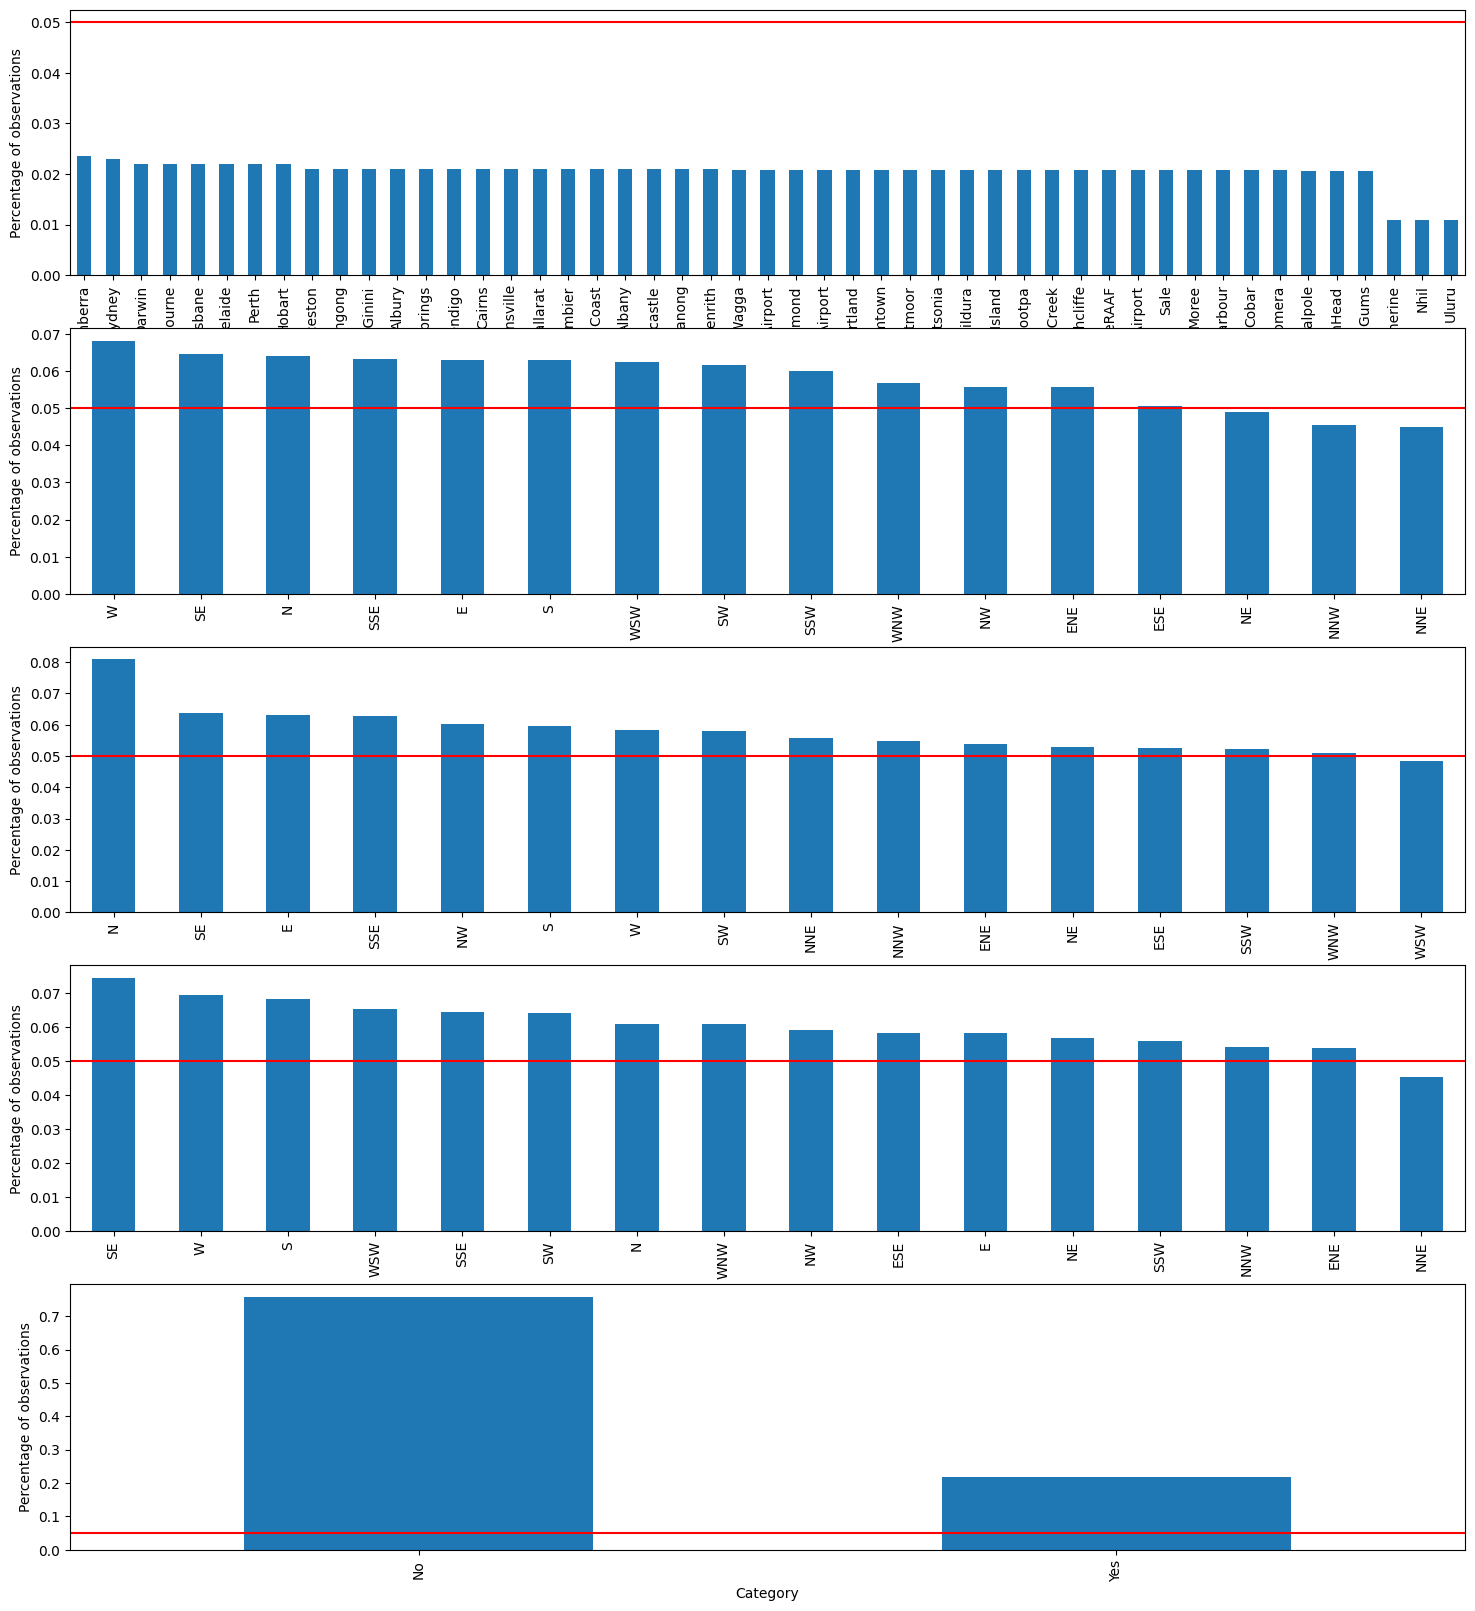

In [37]:
rows = len(australian_weather_data)

fig,axes = plt.subplots(len(cat_features),1,figsize=(18,len(cat_features)*4))
for i,col in enumerate(cat_features):
    frequencies = pd.Series(australian_weather_data[col].value_counts() / rows)
    frequencies.sort_values(ascending=False).plot.bar(ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].axhline(y=0.05, color='red')
    axes[i].set_ylabel('Percentage of observations')
    axes[i].set_xlabel('Category')
plt.show()

Vemos que los datos están bastante balanceados. Tanto las features de ubicación geográfica como de dirección del viento presentan una distribución muy parecida a una uniforme.

**Analicemos las variables compuestas**

In [40]:
australian_weather_data.Date.nunique()

3436

In [43]:
australian_weather_data.groupby(['Date'])['Date'].count()

Date
2007-11-01     1
2007-11-02     1
2007-11-03     1
2007-11-04     1
2007-11-05     1
              ..
2017-06-21    49
2017-06-22    49
2017-06-23    49
2017-06-24    49
2017-06-25    48
Name: Date, Length: 3436, dtype: int64

Tenemos más de 3000 valores distintos para la variable compuesta fecha/hora. Una opción es transformar esta variable **mapeándola con la estación del año (Otoño, Invierno, Primavera, Verano)**.

**Analicemos el (des)balance de la variable target**

In [13]:
australian_weather_data.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

<Axes: >

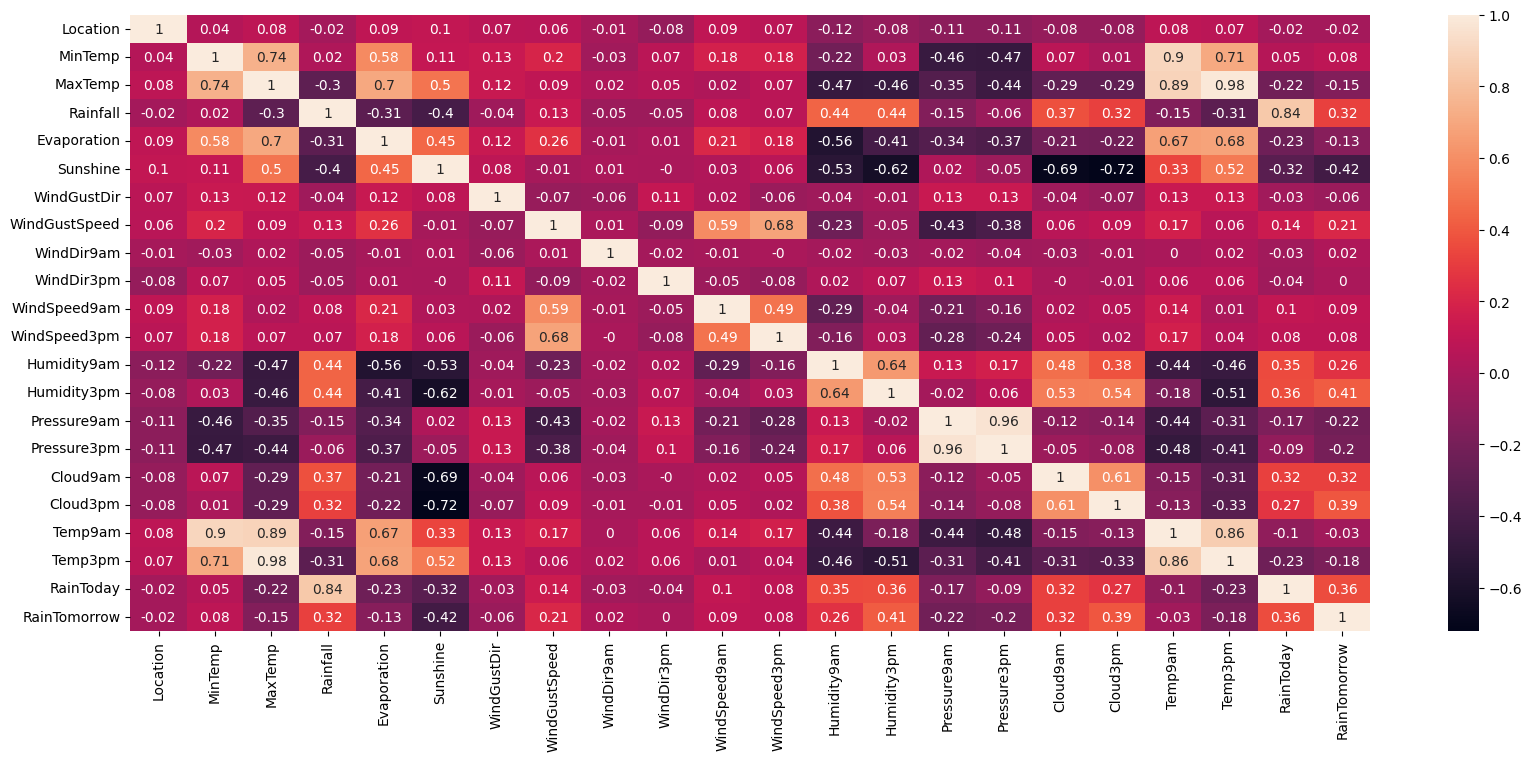

In [26]:
australian_weather_data_reduced = australian_weather_data_encoded.iloc[:,1:]
correlation_matrix = australian_weather_data_reduced.corr(method = 'spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)